In [1]:
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Exercise 1: Linear Regression


In [2]:
data = pd.read_csv('ex1data1.txt', sep=',', skiprows=0, header=None).values
X = np.vstack(data[:,0])
y = np.vstack(data[:,1])
#y


# Part 1: Basic Function 

# Part 2: Plotting

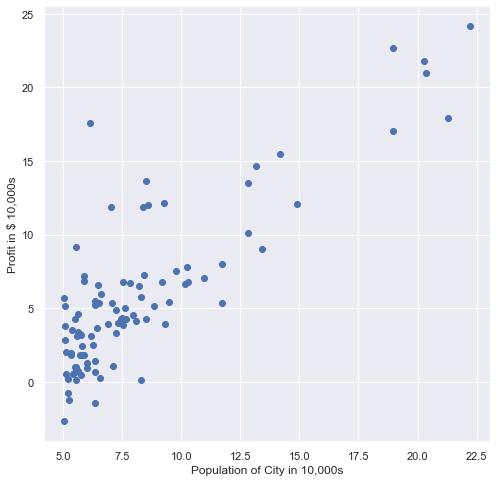

In [3]:
plt.figure(figsize=(8,8))
plt.scatter(X,y)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $ 10,000s")
plt.show()

# Part 3: Cost and Gradient descent

In [4]:
"""
FUNCION QUE CALCULA EL COSTO
"""
def computeCost(X, y, theta):
    """
    X: ejemplos 
    y: valor esperado
    theta: valor theta para la hipotesis(h)
    """
    m, n = y.shape
    J = 0
    #print("theta:", theta)
    for i in range(m):
        J = J + (((theta[0] + theta[1]*X[i,1]) - y[i])**2)/(2*m)
        
    return J
    

In [5]:
m,n = y.shape
X = np.c_[np.ones((m,1)), X] # Add a column of ones to x

theta=[0,0] # initialize fitting parameters

print('\nTesting the cost function ...\n')

# compute and display initial cost
J = computeCost(X, y, theta)
print('With theta = [0 ; 0]\nCost computed = {}'.format(J))
print('Expected cost value (approx) 32.07\n')


Testing the cost function ...

With theta = [0 ; 0]
Cost computed = [32.07273388]
Expected cost value (approx) 32.07



In [6]:
print('\nTesting again the cost function ...\n')
# further testing of the cost function
theta = [-1,2]
J = computeCost(X, y, theta)
print('\nWith theta = [-1 , 2]\nCost computed = ', J)
print('Expected cost value (approx) 54.24\n')
print('Program paused. Press enter to continue.\n')


Testing again the cost function ...


With theta = [-1 , 2]
Cost computed =  [54.24245508]
Expected cost value (approx) 54.24

Program paused. Press enter to continue.



In [7]:
"""
FUNCION QUE CALCULA EL DESCENSO DE GRADIENTE
"""
def theta1(X, y, theta):
    J = 0
    m,n = y.shape
    for i in range(m):
        J = J + ((theta[0] + theta[1]*X[i,1]) - (y[i]))
    return J

def theta2(X, y, theta):
    J = 0
    m,n = y.shape
    for i in range(m):
        J = J + (((theta[0] + theta[1]*X[i,1]) - y[i]) * X[i,1])
    return J

def gradientDescent(X, y, theta, alpha, iterations):
    m, n = y.shape
    J_history = np.ones(iterations)
    t = alpha/m
    
    for i in range(iterations):

        temp0 = theta[0] - t*theta1(X, y, theta)
        temp1 = theta[1] - t*theta2(X, y, theta)
        theta[0] = temp0
        theta[1] = temp1
        #aux =[theta[0], theta[1]]
        
        J_history[i] = computeCost(X, y, theta)
        #print(J_history[i])
    
    return theta, J_history

In [8]:
print('\nRunning Gradient Descent ...\n')
# Some gradient descent settings

iterations = 1500
alpha = 0.01
theta, historia = gradientDescent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:', theta)
print('Expected theta values (approx)')
print(' -3.6303, 1.1664\n\n')


Running Gradient Descent ...

Theta found by gradient descent: [array([-3.70968912]), array([1.17433871])]
Expected theta values (approx)
 -3.6303, 1.1664




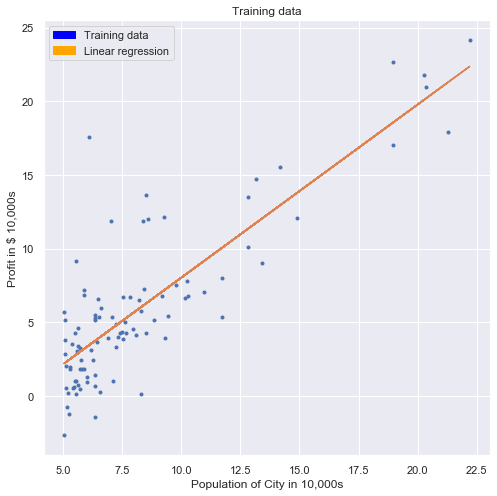

For population = 35,000, we predict a profit of [4004.9636045]

For population = 70,000, we predict a profit of [45106.81840164]

Program paused. Press enter to continue.



In [9]:
# Plot the linear fit
# keep previous plot visible
plt.figure(figsize=(8,8))
plt.title('Training data')
training = mpatches.Patch(color='blue', label='Training data')
regression = mpatches.Patch(color='orange', label='Linear regression')
plt.legend(handles=[training, regression])
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $ 10,000s")
plt.plot(X[:,1], y, ".")
plt.plot(X[:,1], np.dot(X,theta), '-')
plt.show()

#don't overlay any more plots on this figure
#Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5],theta)
print('For population = 35,000, we predict a profit of {}\n'.format(predict1*10000))
predict2 = np.dot([1, 7],theta)
print('For population = 70,000, we predict a profit of {}\n'.format(predict2*10000))
print('Program paused. Press enter to continue.\n')


# Part 4: Visualizing J(theta_0, theta_1)

In [10]:
print('Visualizing J(theta_0, theta_1) ...\n')

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i,j] = computeCost(X, y, t)



# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T



Visualizing J(theta_0, theta_1) ...



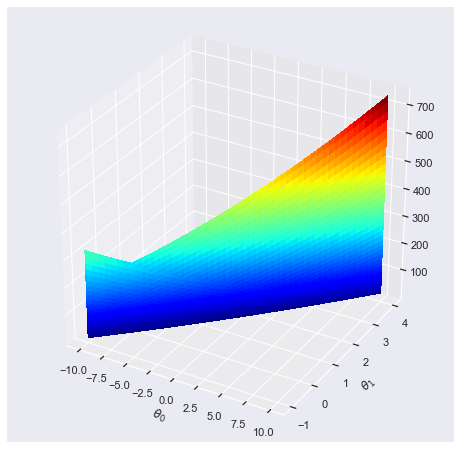

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# Surface plot
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

ax.plot_surface(theta0_vals,
                theta1_vals,
                J_vals,
                rstride=2,
                cstride=2,
                cmap=plt.cm.jet,
                linewidth=0,
                antialiased=False)

ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

plt.show()

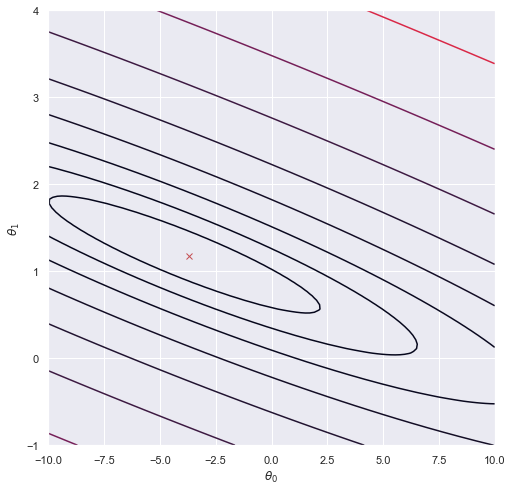

In [12]:
# Contour plot
plt.figure(figsize=(8,8))
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20))
plt.plot(theta[0], theta[1], linestyle='', marker='x', color='r')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

plt.show()

# Exercise 1: Linear regression with multiple variables

# Part 1: Feature Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [14]:
def featureNormalize(X):
    
    scaler = StandardScaler()
    scaler = scaler.fit(X)
    
    mu = scaler.mean_               
    sigma = np.sqrt(scaler.var_)
    X_norm = scaler.transform(X)
    
    return X_norm, mu, sigma
    

In [15]:
data = pd.read_csv('ex1data2.txt', sep=',', skiprows=0, header=None).values
X = data[:,0:2]
y = data[:,2:3]
m = len(y)
#X[0:10] first 10  examples

In [16]:
# Print out some data points
print('First 10 examples from the dataset: \n');
for i in range(10):
    print("x={}, y={}".format(X[i:i+1][0], y[i:i+1][0]))
    
print('Program paused. Press enter to continue.\n')

# Scale features and set them to zero mean
print('Normalizing Features ...\n')

X, mu, sigma = featureNormalize(X)
# Add intercept term to X
X = np.c_[np.ones((m, 1)), X]


First 10 examples from the dataset: 

x=[2104    3], y=[399900]
x=[1600    3], y=[329900]
x=[2400    3], y=[369000]
x=[1416    2], y=[232000]
x=[3000    4], y=[539900]
x=[1985    4], y=[299900]
x=[1534    3], y=[314900]
x=[1427    3], y=[198999]
x=[1380    3], y=[212000]
x=[1494    3], y=[242500]
Program paused. Press enter to continue.

Normalizing Features ...



# Part 2: Gradient Descent

====================== YOUR CODE HERE ======================

In [ ]:

print('Running gradient descent ...\n')

# Choose some alpha value
alpha = 0.01
num_iters = 400

# Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1))
#theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
#######figure;
#######plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
#######xlabel('Number of iterations');
#######ylabel('Cost J');

# Display gradient descent's result
#######fprintf('Theta computed from gradient descent: \n');
#######fprintf(' %f \n', theta);
#######fprintf('\n');